# Projet DS 

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
%matplotlib inline

In [300]:
raw_data = pd.read_csv('octroi_RCI.csv', sep = ';', decimal= ',', header=0, parse_dates=['mois_gestion'], dtype = {'STITUATION_FAM':'category', 'MODE_LOGT':'category', 'VN_VO':'category', 'MARQUE':'category', 'anciennete_rci':'category', 'def12_31': 'category'})
#help(pd.read_csv)
raw_data.head() #(8457, 19)

,ANC_EMPLOI,STITUATION_FAM,MODE_LOGT,AGE_VEH,VN_VO,MARQUE,PRIX_VEH,MT_APPORT,MT_FINANCE,MT_MENS,VR_BALLON,DUREE_CONTRAT,MT_PREST,MT_ASSUR,mois_gestion,age_cli,anciennete_rci,pc_appo,def12_31
0,65,2,1,NaN,VN,REN,19584.65,0.0,19584.65,95.01,19584.63,6,NaN,NaN,2015-01-03,28,1,0,0
1,563,11,2,28.0,VO,REN,16995.00,2123.0,14872.00,312.34,NaN,60,150.0,NaN,2014-01-06,64,3,12,0
2,107,2,2,16.0,VO,REN,19950.00,3869.0,16081.00,329.93,NaN,60,150.0,NaN,2015-01-08,51,3,19,0
3,143,2,2,10.0,VO,REN,17500.00,7143.5,10356.50,217.51,NaN,60,150.0,NaN,2015-01-04,42,4,41,0
4,110,2,NaN,7.0,VO,REN,19740.00,3789.4,15950.60,310.33,7523.04,36,150.0,395.0,2015-01-02,34,4,19,0


In [301]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8457 entries, 0 to 8456
Data columns (total 19 columns):
ANC_EMPLOI        8457 non-null int64
STITUATION_FAM    8457 non-null category
MODE_LOGT         8349 non-null category
AGE_VEH           2454 non-null float64
VN_VO             8457 non-null category
MARQUE            8457 non-null category
PRIX_VEH          8457 non-null float64
MT_APPORT         8457 non-null float64
MT_FINANCE        8457 non-null float64
MT_MENS           8457 non-null float64
VR_BALLON         3219 non-null float64
DUREE_CONTRAT     8457 non-null int64
MT_PREST          7177 non-null float64
MT_ASSUR          1702 non-null float64
mois_gestion      8457 non-null datetime64[ns]
age_cli           8457 non-null int64
anciennete_rci    1186 non-null category
pc_appo           8457 non-null int64
def12_31          8457 non-null category
dtypes: category(6), datetime64[ns](1), float64(8), int64(4)
memory usage: 910.7 KB


## Description du jeu de données 

### Description des variables 

On dispose de 19 variables :
VARIABLE / SEGMENT / TYPE / EXPECTATION

**VARIABLE CIBLE**
- **def12_31**: indique si la personne a fait défaut 1=Oui / 0=Non. var. quali. 2mod

**FEATURES**

Client
- **age_cli**: Age du client. N
- **ANC_EMPLOI** : Ancienneté à l'emploi. N
- **STITUATION_FAM** : Situation familiale. C (6 mods) (1=Marié, 2=Célib, 3=Divorcé, 4=Veuf, 5=Séparé, 11=Colloc)
- **MODE_LOGT** : Mode de logement C (4 mods) (1=locataire, 2=proprio, 3=autre, 4=chez les parents)
- **anciennete_rci**: Ancienneté relation rci. C (4 mods)
- **mois_gestion**: Mois d'entrée en gestion. C

Contrat
- **pc_appo**: Pourcentage d'apport. N
- **MT_APPORT** : Montant de l'apport. N
- **MT_FINANCE** : Montant financé. N
- **MT_MENS**: Montant de la mensualité. N
- **VR_BALLON**: Montant ballon. N
- **DUREE_CONTRAT**: Durée du contrat. N
- **MT_PREST**:	Montant des prestations. N
- **MT_ASSUR**:	Montant des assurances. N

Véhicule
- **PRIX_VEH** : Prix du véhicule. N
- **AGE_VEH** : Age du véhicule. N
- **MARQUE** : Marque. C
- **VN_VO** : Type de véhicule. C (2 mods : VN=véhicule neuf /VO= véhicule occasion)

On s'attend à ce que les variables age du client, ancienneté à l'emploi, pourcentage d'apport / montant apport, durée du contrat et prix du véhicule soient les vars. les plus importantes.

### Etude de la cible 




In [302]:
tab_tmp = pd.crosstab(index = raw_data['def12_31'], columns ='count')
round(tab_tmp/tab_tmp.sum(),3)
pd.concat([tab_tmp,round(tab_tmp/tab_tmp.sum()*100,0)], axis =1, keys= ['Effectif', 'Pourcentage'])

,Effectif,Pourcentage
col_0,count,count
def12_31,,
0,8359,99.0
1,98,1.0


On observe que notre jeu de données est particulièrement déséquilibré. Environ 1% de gens ayant fait défaut.

### Valeurs manquantes

A quel point les valeurs sont manquantes ? 
Est-ce dû au hasard ou est-ce qu'il y a un pattern ? 


In [303]:
total = raw_data.isnull().sum().sort_values(ascending=False)
percentage = (round(raw_data.isnull().sum()/raw_data.isnull().count(), 3)*100).sort_values(ascending = False)
df_tmp = pd.concat([total, percentage], axis=1, keys=['Total', 'Percent'])
df_tmp[df_tmp['Percent'] >0]

,Total,Percent
anciennete_rci,7271,86.0
MT_ASSUR,6755,79.9
AGE_VEH,6003,71.0
VR_BALLON,5238,61.9
MT_PREST,1280,15.1
MODE_LOGT,108,1.3


**QUESTIONS PROF**

anciennete_rci : prof = à quoi ça correspond

MT_ASSUR : NA par 0 (vérifier qu'on peut ne pas prendre d'ass.)

AGE_VEH : remplacer les NA par 0 (car correspondance neuf)

VR_BALLON : remplacer les NA par 0

MT_PREST : valider que c'est bien des options (auquel cas on remplace NA par 0)


**ANCIENNETE_RIC**

In [304]:
#Soit on se débarrasse de l'ancienneté RCI soit ?
raw_data['anciennete_rci']

0         1
1         3
2         3
3         4
4         4
       ... 
8452    NaN
8453    NaN
8454    NaN
8455    NaN
8456    NaN
Name: anciennete_rci, Length: 8457, dtype: category
Categories (5, object): [0, 1, 2, 3, 4]

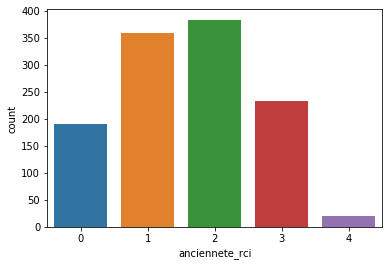

In [305]:
sns.countplot(x='anciennete_rci', data= raw_data);

In [306]:
pd.crosstab(raw_data['anciennete_rci'], columns='count').sort_values(by= ['count'], ascending=False)
total = raw_data.groupby('anciennete_rci').size().sort_values(ascending=False)
percent = round(raw_data.groupby('anciennete_rci').size()/len(raw_data), 3).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
anciennete_rci,,
2,383,0.045
1,358,0.042
3,233,0.028
0,191,0.023
4,21,0.002


La classe la plus importante fait à peine 5%.
*Peut-on remplacer les NA par des valeurs ?*

2 solutions possibles à mon sens : 

1) on se débarrasse de la variable

2) on essaie d'inférer les valeurs manquantes à l'aide de la variable 'duree contrat', le mois d'entré en gestion

In [307]:
df = raw_data.copy()
df[['anciennete_rci', 'DUREE_CONTRAT']].groupby('anciennete_rci').mean()

,DUREE_CONTRAT
anciennete_rci,
0,20.727749
1,29.100559
2,43.344648
3,44.175966
4,48.571429


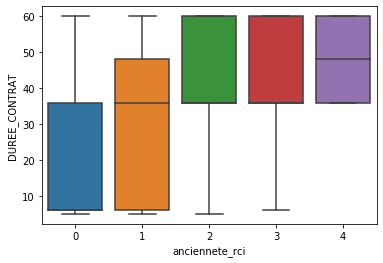

In [308]:
#on voit bien que la duree du contrat augmente avec l'anciennete
sns.boxplot(x='anciennete_rci', y='DUREE_CONTRAT', data= df);

On remarque qu'il a tout de même un certain nombre de clients récents qui se voit accorder un contrat d'une longue durée. Peut être que l'indicateur basé à partir de mois_gestion est utile aussi finalement

In [309]:
#clients récents qui se voit accorder un contrat d'une longue durée
#df.loc[(df['anciennete_rci']==0) & (df['DUREE_CONTRAT'] > 40)]

In [310]:
df.loc[(df['anciennete_rci'].isna()) & (df['DUREE_CONTRAT'] <= 25), ['anciennete_rci', 'DUREE_CONTRAT']]

,anciennete_rci,DUREE_CONTRAT
770,NaN,24
825,NaN,6
826,NaN,6
827,NaN,6
938,NaN,6
...,...,...
8340,NaN,24
8353,NaN,12
8421,NaN,24
8438,NaN,24


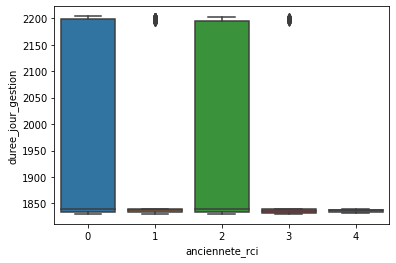

In [311]:
now = pd.to_datetime('15/01/2020')
df = df.assign(duree_jour_gestion = (now - df.mois_gestion).dt.days)
sns.boxplot(x='anciennete_rci', y='duree_jour_gestion', data= df);

In [312]:
df = df.drop('anciennete_rci', axis=1)

**MT_ASSUR**

In [313]:
df[df['MT_ASSUR'] ==0] #on ne dispose d'aucune ligne dont le montant d'assurance est nul
df = df.fillna(value={'MT_ASSUR':0})    #on peut imaginer remplacer les NaN par des zéros

**AGE_VEH**

On s'aperçoit que les valeurs manquantes correspondent aux véhicules neufs.

In [314]:
df[['AGE_VEH', 'VN_VO']]

,AGE_VEH,VN_VO
0,NaN,VN
1,28.0,VO
2,16.0,VO
3,10.0,VO
4,7.0,VO
...,...,...
8452,NaN,VN
8453,NaN,VN
8454,NaN,VN
8455,NaN,VN


In [315]:
df = df.fillna(value={'AGE_VEH':0})

**VR_BALLON**

In [316]:
df = df.fillna(value={'VR_BALLON':0})

**MT_PREST**

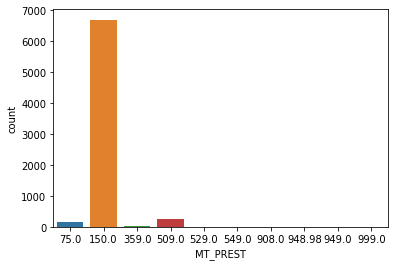

In [317]:
sns.countplot(x='MT_PREST', data= raw_data);

In [318]:
total = raw_data.groupby('MT_PREST').size()
percent = round(raw_data.groupby('MT_PREST').size()/len(raw_data),2) 
pd.concat([total, percent], axis=1, keys= ['Total', 'Percent'])

,Total,Percent
MT_PREST,,
75.00,166,0.02
150.00,6691,0.79
359.00,39,0.00
509.00,268,0.03
529.00,2,0.00
549.00,3,0.00
908.00,2,0.00
948.98,1,0.00
949.00,1,0.00


In [319]:
df = df.fillna(value={'MT_PREST':0})    

**MODE_LOGT**

In [320]:
#rappel : situation_fam  (1=Marié, 2=Célib, 3=Divorcé, 4=Veuf, 5=Séparé, 11=Colloc)
#MODE_LOGT Mode de logement C (4 mods) (1=locataire, 2=proprio, 3=autre, 4=chez les parents)
df_tmp = df.loc[df['MODE_LOGT'].isna()]
#sns.countplot(x='STITUATION_FAM', data=df_tmp);
df_tmp.groupby('STITUATION_FAM').size()

STITUATION_FAM
1     61
11     6
2     36
3      0
4      1
5      4
dtype: int64

61 Mariés, 
36 Célibs

In [321]:
ct = pd.crosstab(df['MODE_LOGT'], df['STITUATION_FAM'], normalize=True)
stat, p, dof, exp = stats.chi2_contingency(ct)
print('Stat = {0:.3f}, p = {1:.3f}, donc on rejette pas l hyp d indépendance '.format(stat, p))

Stat = 0.363, p = 1.000, donc on rejette pas l hyp d indépendance 


Catégories fortements rpz:
63% des inds sont mariés et proprios. Vient ensuite les célib/proprios, les célib/chez les parents, les mariés locataires. 

vs
Catégories très peu représentés :
Autre, 

=> 75% de chance d'être proprio.
Intéressant de regarder les profils colonnes

In [322]:
#round(ct.apply(lambda col : col / sum(col), axis=0),3)
#même chose qu'en dessous !
print('TABLEAU PROFILS COLONNES')
round(pd.crosstab(df['MODE_LOGT'], df['STITUATION_FAM'], normalize = 'columns', margins=True, dropna=True),3)

TABLEAU PROFILS COLONNES


STITUATION_FAM,1,11,2,3,4,5,All
MODE_LOGT,,,,,,,
1,0.102,0.353,0.212,0.223,0.026,0.305,0.137
2,0.883,0.538,0.379,0.702,0.967,0.627,0.764
3,0.004,0.058,0.013,0.008,0.000,0.017,0.008
4,0.011,0.052,0.397,0.066,0.007,0.051,0.091


#rappel : situation_fam  (1=Marié, 2=Célib, 3=Divorcé, 4=Veuf, 5=Séparé, 11=Colloc)
#MODE_LOGT Mode de logement C (4 mods) (1=locataire, 2=proprio, 3=autre, 4=chez les parents)

1 (61) : Parmi les gens mariés, 88% sont proprios
2 (36) : Parmi les gens célibataires, c'est plus compliqué.. 1,2 ou 4..
4 (1) : Parmi les veufs, 96% sont proprios 
5 (4) : Parmi les séparés, env 60% proprios, 30% loc
11 (6) : Parmi les colocs, env 55% sont proprios et 35% sont locataires

Il y 80% d'être proprio quand on est marié. On décide de remplacer les NA Mode Logt des mariés par proprio et on se débarrasse des autres lignes. 

In [323]:
df.loc[(df['MODE_LOGT'].isna()) & (df['STITUATION_FAM']=='1'),['MODE_LOGT']] = '2'

In [324]:
df.loc[(df['MODE_LOGT'].isna()) & (df['STITUATION_FAM']=='11'),['MODE_LOGT']] = '2'

In [325]:
df.loc[(df['MODE_LOGT'].isna()) & (df['STITUATION_FAM']=='4'),['MODE_LOGT']] = '2'

In [326]:
df.loc[(df['MODE_LOGT'].isna()) & (df['STITUATION_FAM']=='5'),['MODE_LOGT']] = '2'

In [327]:
idx_todelete = df.loc[(df['MODE_LOGT'].isna()) & (df['STITUATION_FAM']=='2'),].index
df = df.drop(idx_todelete, axis=0)

 **VERIFICATION NA**

In [328]:
df.shape #vs (8457, 19), on a bien supprimé 36 obs

(8421, 19)

In [329]:
df.isnull().sum().sort_values(ascending=False)

duree_jour_gestion    0
MT_FINANCE            0
STITUATION_FAM        0
MODE_LOGT             0
AGE_VEH               0
VN_VO                 0
MARQUE                0
PRIX_VEH              0
MT_APPORT             0
MT_MENS               0
def12_31              0
VR_BALLON             0
DUREE_CONTRAT         0
MT_PREST              0
MT_ASSUR              0
mois_gestion          0
age_cli               0
pc_appo               0
ANC_EMPLOI            0
dtype: int64

### Analyse des variables quantitatives 

On s'attend à rajouter à notre df 13 nouvelles variables (19 + 13 = 32)

In [330]:
num_feats = df.dtypes[(df.dtypes != 'category')].index
num_feats = num_feats.drop('mois_gestion')
list(num_feats) #13

['ANC_EMPLOI',
 'AGE_VEH',
 'PRIX_VEH',
 'MT_APPORT',
 'MT_FINANCE',
 'MT_MENS',
 'VR_BALLON',
 'DUREE_CONTRAT',
 'MT_PREST',
 'MT_ASSUR',
 'age_cli',
 'pc_appo',
 'duree_jour_gestion']

**ANC EMPLOI**

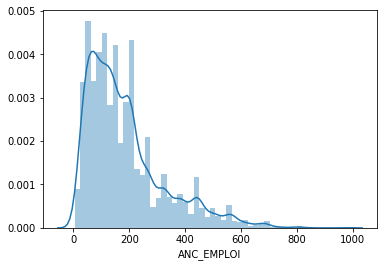

In [331]:
sns.distplot(df['ANC_EMPLOI']);

In [332]:
df['ANC_EMPLOI_CAT'] = pd.cut(df['ANC_EMPLOI']/12, precision=0, bins= 4)

In [333]:
df.groupby('ANC_EMPLOI_CAT').size()

ANC_EMPLOI_CAT
(0.0, 21.0]     6392
(21.0, 41.0]    1638
(41.0, 61.0]     375
(61.0, 81.0]      16
dtype: int64

**AGE_VEH**

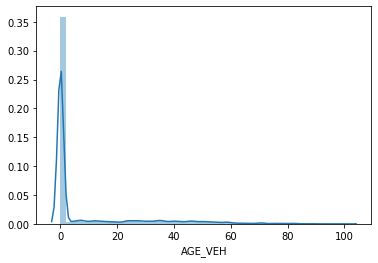

In [334]:
sns.distplot(df['AGE_VEH']);

In [335]:
'''
On a une grosse classe env.80%. Mais on a quand même envie de garder l'info 
'mon véhicule date de 3 ans vs 10 ans'
'''
df['AGE_VEH_CAT'] = 0
#df.loc[df['AGE_VEH'] ==0, ['AGE_VEH_CAT']] = '(0,0]' #6000. 
df.loc[(df['AGE_VEH'] <= 10), ['AGE_VEH_CAT']] = '(0,10]' #1250
df.loc[(df['AGE_VEH'] > 10), ['AGE_VEH_CAT']] = '(10,.]' #1250

In [336]:
df.head()

,ANC_EMPLOI,STITUATION_FAM,MODE_LOGT,AGE_VEH,VN_VO,MARQUE,PRIX_VEH,MT_APPORT,MT_FINANCE,MT_MENS,...,DUREE_CONTRAT,MT_PREST,MT_ASSUR,mois_gestion,age_cli,pc_appo,def12_31,duree_jour_gestion,ANC_EMPLOI_CAT,AGE_VEH_CAT
0,65,2,1,0.0,VN,REN,19584.65,0.0,19584.65,95.01,...,6,0.0,0.0,2015-01-03,28,0,0,1838,"(0.0, 21.0]","(0,10]"
1,563,11,2,28.0,VO,REN,16995.00,2123.0,14872.00,312.34,...,60,150.0,0.0,2014-01-06,64,12,0,2200,"(41.0, 61.0]","(10,.]"
2,107,2,2,16.0,VO,REN,19950.00,3869.0,16081.00,329.93,...,60,150.0,0.0,2015-01-08,51,19,0,1833,"(0.0, 21.0]","(10,.]"
3,143,2,2,10.0,VO,REN,17500.00,7143.5,10356.50,217.51,...,60,150.0,0.0,2015-01-04,42,41,0,1837,"(0.0, 21.0]","(0,10]"
5,446,1,2,0.0,VN,DAC,14900.00,7900.0,7000.00,220.97,...,36,150.0,0.0,2015-01-08,55,53,0,1833,"(21.0, 41.0]","(0,10]"


**PRIX VEHICULE**

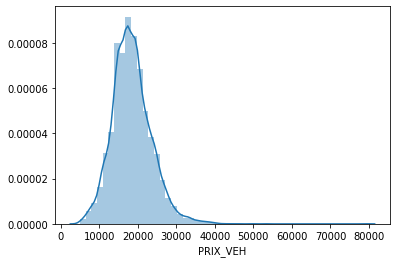

In [337]:
sns.distplot(df['PRIX_VEH']);

In [338]:
round(df['PRIX_VEH'].describe(),)

count     8421.0
mean     18494.0
std       5128.0
min       5000.0
25%      15000.0
50%      18000.0
75%      21390.0
max      79000.0
Name: PRIX_VEH, dtype: float64

In [339]:
df['PRIX_VEH_CAT'] = 0
df.loc[df['PRIX_VEH']<=15000, ['PRIX_VEH_CAT']] = '(0, 15000]'
df.loc[(df['PRIX_VEH']>15000) & (df['PRIX_VEH']<=18000), ['PRIX_VEH_CAT']] = '(15000, 18000]'
df.loc[(df['PRIX_VEH']>18000) & (df['PRIX_VEH']<=21000), ['PRIX_VEH_CAT']] = '(18000, 21000]'
df.loc[(df['PRIX_VEH']>21000), ['PRIX_VEH_CAT']] = '(21000, .]'

In [340]:
df.groupby('PRIX_VEH_CAT').size()

PRIX_VEH_CAT
(0, 15000]        2133
(15000, 18000]    2109
(18000, 21000]    1949
(21000, .]        2230
dtype: int64

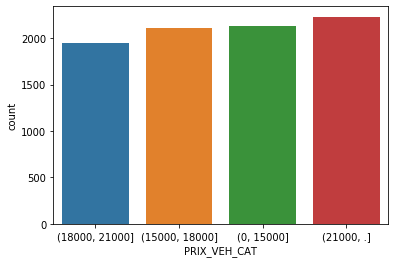

In [341]:
sns.countplot(x='PRIX_VEH_CAT', data=df);

**MT_APPORT**

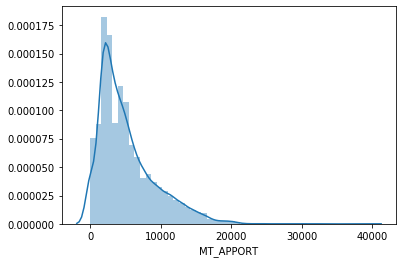

In [342]:
sns.distplot(df['MT_APPORT']);

In [343]:
df['MT_APPORT'].describe()

count     8421.000000
mean      5169.409467
std       4051.228765
min          0.000000
25%       2150.000000
50%       4000.000000
75%       7000.000000
max      39394.000000
Name: MT_APPORT, dtype: float64

In [344]:
df['MT_APPORT_CAT'] = 0
df.loc[df['MT_APPORT']<=2000, ['MT_APPORT_CAT']] = '(0, 2000]'
df.loc[(df['MT_APPORT']>2000) & (df['MT_APPORT']<=4000), ['MT_APPORT_CAT']] = '(2000, 4000]'
df.loc[(df['MT_APPORT']>4000) & (df['MT_APPORT']<=7000), ['MT_APPORT_CAT']] = '(4000, 7000]'
df.loc[(df['MT_APPORT']>7000), ['MT_APPORT_CAT']] = '(7000, .]'

In [345]:
df.groupby('MT_APPORT_CAT').size()

MT_APPORT_CAT
(0, 2000]       1981
(2000, 4000]    2354
(4000, 7000]    2016
(7000, .]       2070
dtype: int64

**MT_FINANCE**

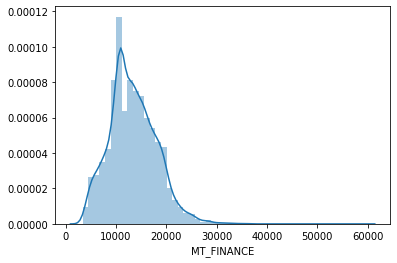

In [346]:
sns.distplot(df['MT_FINANCE']);

In [347]:
df['MT_FINANCE'].describe()

count     8421.000000
mean     13324.817436
std       4661.650546
min       3350.000000
25%      10110.000000
50%      12951.000000
75%      16335.000000
max      59000.000000
Name: MT_FINANCE, dtype: float64

In [348]:
df['MT_FINANCE_CAT'] = 0
df.loc[df['MT_FINANCE']<=10000, ['MT_FINANCE_CAT']] = '(0, 10000]'
df.loc[(df['MT_FINANCE']>10000) & (df['MT_FINANCE']<=13000), ['MT_FINANCE_CAT']] = '(10000, 13000]'
df.loc[(df['MT_FINANCE']>13000) & (df['MT_FINANCE']<=16000), ['MT_FINANCE_CAT']] = '(10000, 16000]'
df.loc[(df['MT_FINANCE']>16000), ['MT_FINANCE_CAT']] = '(16000, .]'

In [349]:
df.groupby('MT_FINANCE_CAT').size()

MT_FINANCE_CAT
(0, 10000]        2024
(10000, 13000]    2300
(10000, 16000]    1858
(16000, .]        2239
dtype: int64

In [350]:
for name in ['ANC_EMPLOI_CAT', 'AGE_VEH_CAT', 'PRIX_VEH_CAT', 'MT_APPORT_CAT', 'MT_FINANCE_CAT']:
    df[name] = pd.Categorical(df[name])

**From MT_MENS to pc_appo**

In [351]:
for col in list(num_feats):
    df[col +'_CAT'] = pd.cut(df[col], precision=0, bins= 4) 
    df[col + '_CAT'] = pd.Categorical(df[col+ '_CAT'])

In [352]:
df.head() #(8421, 32)

,ANC_EMPLOI,STITUATION_FAM,MODE_LOGT,AGE_VEH,VN_VO,MARQUE,PRIX_VEH,MT_APPORT,MT_FINANCE,MT_MENS,...,MT_APPORT_CAT,MT_FINANCE_CAT,MT_MENS_CAT,VR_BALLON_CAT,DUREE_CONTRAT_CAT,MT_PREST_CAT,MT_ASSUR_CAT,age_cli_CAT,pc_appo_CAT,duree_jour_gestion_CAT
0,65,2,1,0.0,VN,REN,19584.65,0.0,19584.65,95.01,...,"(-39.0, 9848.0]","(17262.0, 31175.0]","(54.0, 592.0]","(13679.0, 20518.0]","(5.0, 19.0]","(-1.0, 250.0]","(-2.0, 509.0]","(19.0, 36.0]","(-0.1, 21.0]","(1830.0, 1924.0]"
1,563,11,2,28.0,VO,REN,16995.00,2123.0,14872.00,312.34,...,"(-39.0, 9848.0]","(3294.0, 17262.0]","(54.0, 592.0]","(-27.0, 6839.0]","(46.0, 60.0]","(-1.0, 250.0]","(-2.0, 509.0]","(52.0, 68.0]","(-0.1, 21.0]","(2111.0, 2205.0]"
2,107,2,2,16.0,VO,REN,19950.00,3869.0,16081.00,329.93,...,"(-39.0, 9848.0]","(3294.0, 17262.0]","(54.0, 592.0]","(-27.0, 6839.0]","(46.0, 60.0]","(-1.0, 250.0]","(-2.0, 509.0]","(36.0, 52.0]","(-0.1, 21.0]","(1830.0, 1924.0]"
3,143,2,2,10.0,VO,REN,17500.00,7143.5,10356.50,217.51,...,"(-39.0, 9848.0]","(3294.0, 17262.0]","(54.0, 592.0]","(-27.0, 6839.0]","(46.0, 60.0]","(-1.0, 250.0]","(-2.0, 509.0]","(36.0, 52.0]","(21.0, 42.0]","(1830.0, 1924.0]"
5,446,1,2,0.0,VN,DAC,14900.00,7900.0,7000.00,220.97,...,"(-39.0, 9848.0]","(3294.0, 17262.0]","(54.0, 592.0]","(-27.0, 6839.0]","(32.0, 46.0]","(-1.0, 250.0]","(-2.0, 509.0]","(52.0, 68.0]","(42.0, 63.0]","(1830.0, 1924.0]"


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8421 entries, 0 to 8456
Data columns (total 32 columns):
ANC_EMPLOI                8421 non-null int64
STITUATION_FAM            8421 non-null category
MODE_LOGT                 8421 non-null category
AGE_VEH                   8421 non-null float64
VN_VO                     8421 non-null category
MARQUE                    8421 non-null category
PRIX_VEH                  8421 non-null float64
MT_APPORT                 8421 non-null float64
MT_FINANCE                8421 non-null float64
MT_MENS                   8421 non-null float64
VR_BALLON                 8421 non-null float64
DUREE_CONTRAT             8421 non-null int64
MT_PREST                  8421 non-null float64
MT_ASSUR                  8421 non-null float64
mois_gestion              8421 non-null datetime64[ns]
age_cli                   8421 non-null int64
pc_appo                   8421 non-null int64
def12_31                  8421 non-null category
duree_jour_gestion       

## Tableaux Profils Colonne

On dispose désormais de **17** variables qualitatives à étudier

In [354]:
#num_feats = df.dtypes[df.dtypes != 'category'].index
cat_feats = df.dtypes[df.dtypes == 'category'].index
cat_feats = cat_feats.drop('def12_31')
list(cat_feats)

['STITUATION_FAM',
 'MODE_LOGT',
 'VN_VO',
 'MARQUE',
 'ANC_EMPLOI_CAT',
 'AGE_VEH_CAT',
 'PRIX_VEH_CAT',
 'MT_APPORT_CAT',
 'MT_FINANCE_CAT',
 'MT_MENS_CAT',
 'VR_BALLON_CAT',
 'DUREE_CONTRAT_CAT',
 'MT_PREST_CAT',
 'MT_ASSUR_CAT',
 'age_cli_CAT',
 'pc_appo_CAT',
 'duree_jour_gestion_CAT']

On créer 2 fonctions pour nous permettre d'afficher les deux tableaux profils / colonne

In [355]:
#Pour afficher deux tableaux en même temps
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [356]:
def comparer_cible(name):
    d1 = pd.crosstab(df.loc[df['def12_31']=='0', name], df.loc[df['def12_31']=='0','def12_31'])
    d2 = round(pd.crosstab(df.loc[df['def12_31']=='0', name], df.loc[df['def12_31']=='0','def12_31'], normalize='columns'),2)*100

    d3 = pd.crosstab(df.loc[df['def12_31']=='1', name], df.loc[df['def12_31']=='1','def12_31'])
    d4 = round(pd.crosstab(df.loc[df['def12_31']=='1', name], df.loc[df['def12_31']=='1','def12_31'], normalize='columns'),2)*100
    
    df_tmp1 = pd.concat([d1,d2], axis=1, keys=['Effectif', 'Pourcentage'])
    df_tmp2 = pd.concat([d3,d4], axis=1, keys=['Effectif', 'Pourcentage'])
    
    display_side_by_side(df_tmp1, df_tmp2)

def afficher_chi2(name, df):
    df_tmp = pd.crosstab(df[name], df['def12_31'])
    stat, p, df , exp = stats.chi2_contingency(df_tmp)
    #print('Test {0}, stat= {1:.0f}, p = {2}'.format(name, stat, p))
    return [stat, p]

In [410]:
def comparer_2dist(name_var,df,x=0):
    df0 = df.loc[df['def12_31']=='0', ]
    df1 = df.loc[df['def12_31']=='1', ]

    fig, ax = plt.subplots()
    sns.distplot(df0[name_var], hist=False, rug=True, color='b')
    sns.distplot(df1[name_var], hist=False,rug=True, color='r')
    ax.legend(('0', '1'), loc='upper right')
    ax.set_xlabel(name_var)
    ax.axvline(x);

In [357]:
l = []
for col in cat_feats:
    l.append(afficher_chi2(col, df))
df_tmp = pd.DataFrame(l, columns=['stat', 'p']).sort_values('stat', ascending=False)
for name, stat, p in zip(cat_feats, df_tmp['stat'], df_tmp['p']):
    print('Test {0}, stat= {1:.0f}, p = {2}'.format(name, stat, p))

Test STITUATION_FAM, stat= 109, p = 5.927563509555127e-11
Test MODE_LOGT, stat= 48, p = 2.475753785157915e-10
Test VN_VO, stat= 42, p = 5.000030164998796e-09
Test MARQUE, stat= 37, p = 4.530425322578564e-08
Test ANC_EMPLOI_CAT, stat= 35, p = 3.334369261546793e-09
Test AGE_VEH_CAT, stat= 34, p = 2.7697158382887374e-06
Test PRIX_VEH_CAT, stat= 32, p = 6.333019002402366e-07
Test MT_APPORT_CAT, stat= 28, p = 3.327593260055997e-06
Test MT_FINANCE_CAT, stat= 13, p = 0.0038942699690088256
Test MT_MENS_CAT, stat= 13, p = 0.004626344730237954
Test VR_BALLON_CAT, stat= 11, p = 0.010905613713833352
Test DUREE_CONTRAT_CAT, stat= 11, p = 0.013215175174174877
Test MT_PREST_CAT, stat= 9, p = 0.03195899732411066
Test MT_ASSUR_CAT, stat= 4, p = 0.22982422330209307
Test age_cli_CAT, stat= 2, p = 0.14936642525049731
Test pc_appo_CAT, stat= 1, p = 0.9096197761269706
Test duree_jour_gestion_CAT, stat= 0, p = 0.9400320842095564


**IL FAUDRA PENSER A ETUDIER LES VARS QUALI D'ORIGINE**

...



**ANC_EMPLOI_CAT**

In [358]:
comparer_cible('ANC_EMPLOI_CAT')

,Effectif,Pourcentage
def12_31,0,0
ANC_EMPLOI_CAT,,
"(3.0, 246.0]",6305,76.0
"(246.0, 489.0]",1632,20.0
"(489.0, 732.0]",373,4.0
"(732.0, 974.0]",16,0.0
,Effectif,Pourcentage
def12_31,1,1
ANC_EMPLOI_CAT,,
"(3.0, 246.0]",87,92.0


In [ ]:
df['ANC_EMPLOI'] = df['ANC_EMPLOI']/12

In [363]:
df['ANC_EMPLOI_CAT2'] = 0
df.loc[(df['ANC_EMPLOI']<=5), ['ANC_EMPLOI_CAT2']] = '(0, 5]'
df.loc[(df['ANC_EMPLOI']>5) & (df['ANC_EMPLOI']<=10), ['ANC_EMPLOI_CAT2']] = '(5, 10]'
df.loc[(df['ANC_EMPLOI']>10) & (df['ANC_EMPLOI']<=20), ['ANC_EMPLOI_CAT2']] = '(10, 20]'
df.loc[(df['ANC_EMPLOI']>20), ['ANC_EMPLOI_CAT2']] = '(20, .]'

In [364]:
comparer_cible('ANC_EMPLOI_CAT2')

,Effectif,Pourcentage
def12_31,0,0
ANC_EMPLOI_CAT2,,
"(0, 5]",1414,17.0
"(10, 20]",2909,35.0
"(20, .]",2050,25.0
"(5, 10]",1953,23.0
,Effectif,Pourcentage
def12_31,1,1
ANC_EMPLOI_CAT2,,
"(0, 5]",28,29.0


La nouvelle répartition est bien plus intéressante. Le pourcentage de très jeunes employés est quasiment le double chez les personnes qui ont fait défaut. 
On observe une autre grosse différence sur l'intervalle des plus de 20 ans d'ancienneté (3x supérieur chez les non-défaut)


**AGE_VEH_CAT**

In [365]:
comparer_cible('AGE_VEH_CAT')

,Effectif,Pourcentage
def12_31,0,0
AGE_VEH_CAT,,
"(-0.0, 25.0]",6925,83.0
"(25.0, 50.0]",963,12.0
"(50.0, 76.0]",374,4.0
"(76.0, 101.0]",64,1.0
,Effectif,Pourcentage
def12_31,1,1
AGE_VEH_CAT,,
"(-0.0, 25.0]",54,57.0


On a plusieurs classes qui sont très peu représentée dont il va falloir se débarrasser. 

count    8421.000000
mean        9.215414
std        18.109856
min         0.000000
25%         0.000000
50%         0.000000
75%         8.000000
max       101.000000
Name: AGE_VEH, dtype: float64

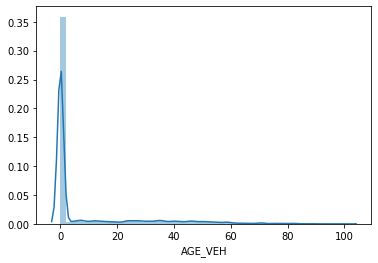

In [369]:
sns.distplot(df['AGE_VEH']);
df['AGE_VEH'].describe()

In [372]:
df['AGE_VEH_CAT2'] = 0
df.loc[(df['AGE_VEH']==0), ['AGE_VEH_CAT2']] = '0'
df.loc[(df['AGE_VEH']>0) & (df['AGE_VEH']<=40), ['AGE_VEH_CAT2']] = '(0,40]'
df.loc[(df['AGE_VEH']>40), ['AGE_VEH_CAT2']] = '(40,.]'

In [373]:
comparer_cible('AGE_VEH_CAT2')

,Effectif,Pourcentage
def12_31,0,0
AGE_VEH_CAT2,,
"(0,40]",1599,19.0
"(40,.]",785,9.0
0,5942,71.0
,Effectif,Pourcentage
def12_31,1,1
AGE_VEH_CAT2,,
"(0,40]",28,29.0
"(40,.]",26,27.0


Ce découpage de la variable AGE_VEH_CAT2 est plus intéressant. On a bien 3 classes bien représentées

**PRIX_VEH_CAT**

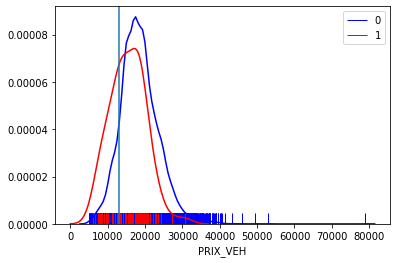

In [411]:
comparer_2dist('PRIX_VEH', df, 13000)

In [405]:
df['PRIX_VEH_CAT2'] = 0
df.loc[(df['PRIX_VEH']<=13000), ['PRIX_VEH_CAT2']] = '(0,13000]'
df.loc[(df['PRIX_VEH']>13000), ['PRIX_VEH_CAT2']] = '(13000,.]'

In [406]:
comparer_cible('PRIX_VEH_CAT2')

,Effectif,Pourcentage
def12_31,0,0
PRIX_VEH_CAT2,,
"(0,13000]",1003,12.0
"(13000,.]",7323,88.0
,Effectif,Pourcentage
def12_31,1,1
PRIX_VEH_CAT2,,
"(0,13000]",31,33.0
"(13000,.]",64,67.0


**MT_APPORT**

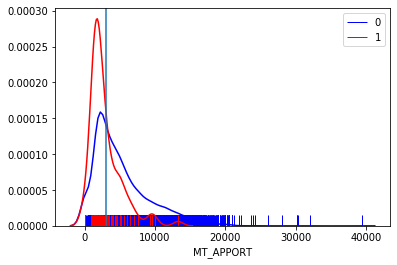

In [416]:
comparer_2dist('MT_APPORT', df, 3000)

In [417]:
df['MT_APPORT_CAT2'] = 0
df.loc[(df['MT_APPORT']<=3000), ['MT_APPORT_CAT2']] = '(0,3000]'
df.loc[(df['MT_APPORT']>3000), ['MT_APPORT_CAT2']] = '(3000,.]'

In [419]:
comparer_cible('MT_APPORT_CAT2')

,Effectif,Pourcentage
def12_31,0,0
MT_APPORT_CAT2,,
"(0,3000]",3262,39.0
"(3000,.]",5064,61.0
,Effectif,Pourcentage
def12_31,1,1
MT_APPORT_CAT2,,
"(0,3000]",64,67.0
"(3000,.]",31,33.0


**MT_FINANCE_CAT**

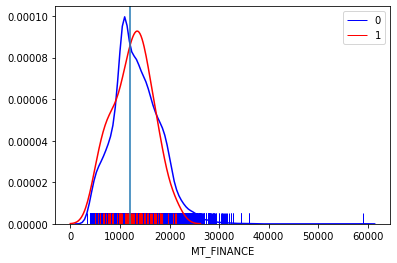

In [429]:
comparer_2dist('MT_FINANCE', df, 12000); #9000 & 

In [430]:
df['MT_FINANCE_CAT2']=0
df.loc[(df['MT_FINANCE']<=9000), ['MT_FINANCE_CAT2']] = '(0,9000]'
df.loc[(df['MT_FINANCE']>9000) & (df['MT_FINANCE']<=12000), ['MT_FINANCE_CAT2']] = '(9000,12000]'
df.loc[(df['MT_FINANCE']>12000), ['MT_FINANCE_CAT2']] = '(12000,.]'

In [432]:
comparer_cible('MT_FINANCE_CAT2')

,Effectif,Pourcentage
def12_31,0,0
MT_FINANCE_CAT2,,
"(0,9000]",1416,17.0
"(12000,.]",4715,57.0
"(9000,12000]",2195,26.0
,Effectif,Pourcentage
def12_31,1,1
MT_FINANCE_CAT2,,
"(0,9000]",21,22.0
"(12000,.]",52,55.0


In [433]:
comparer_cible('MT_FINANCE_CAT')

,Effectif,Pourcentage
def12_31,0,0
MT_FINANCE_CAT,,
"(3294.0, 17262.0]",6653,80.0
"(17262.0, 31175.0]",1659,20.0
"(31175.0, 45088.0]",13,0.0
"(45088.0, 59000.0]",1,0.0
,Effectif,Pourcentage
def12_31,1,1
MT_FINANCE_CAT,,
"(3294.0, 17262.0]",84,88.0


On remarque qu'en dépit de notre manière de découper la variable les deux distributions sont très peu séparable ! Cela concorde avec le test du Chi2 d'indépendance. 

**VR_BALLON**

## Etude variables qualitatives

**MARQUE** (Grosse influence d'après le test du Khi2)

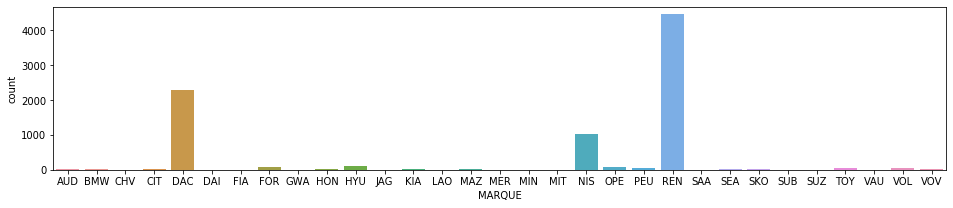

In [58]:
plt.figure(figsize=(16,3))
sns.countplot(df['MARQUE']);

## Corrélations entre les features (après)

In [59]:
df.head()

,ANC_EMPLOI,STITUATION_FAM,MODE_LOGT,AGE_VEH,VN_VO,MARQUE,PRIX_VEH,MT_APPORT,MT_FINANCE,MT_MENS,...,age_cli,anciennete_rci,pc_appo,def12_31,duree_jour_gestion,ANC_EMPLOI_CAT,AGE_VEH_CAT,PRIX_VEH_CAT,MT_APPORT_CAT,MT_FINANCE_CAT
0,65,2,1,0.0,VN,REN,19584.65,0.0,19584.65,95.01,...,28,1,0,0,1838,"(0.0, 21.0]","(0,10]","(18000, 21000]","(0, 2000]","(16000, .]"
1,563,11,2,28.0,VO,REN,16995.00,2123.0,14872.00,312.34,...,64,3,12,0,2200,"(41.0, 61.0]","(10,.]","(15000, 18000]","(2000, 4000]","(10000, 16000]"
2,107,2,2,16.0,VO,REN,19950.00,3869.0,16081.00,329.93,...,51,3,19,0,1833,"(0.0, 21.0]","(10,.]","(18000, 21000]","(2000, 4000]","(16000, .]"
3,143,2,2,10.0,VO,REN,17500.00,7143.5,10356.50,217.51,...,42,4,41,0,1837,"(0.0, 21.0]","(0,10]","(15000, 18000]","(7000, .]","(10000, 13000]"
4,110,2,NaN,7.0,VO,REN,19740.00,3789.4,15950.60,310.33,...,34,4,19,0,1839,"(0.0, 21.0]","(0,10]","(18000, 21000]","(2000, 4000]","(10000, 16000]"


''

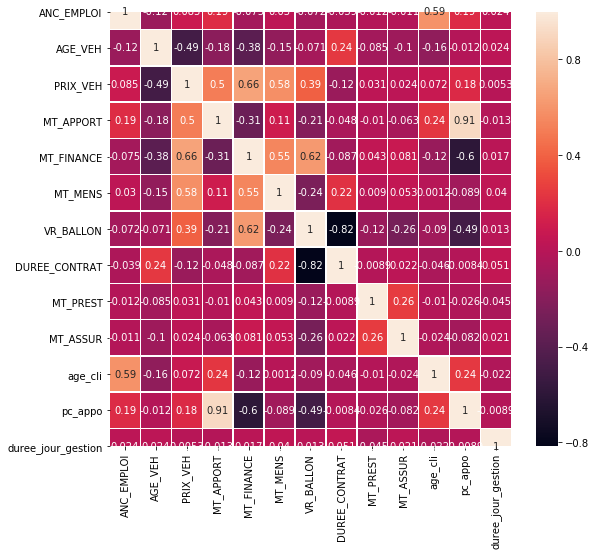

In [60]:
num_feats = df.dtypes[df.dtypes != 'category'].index
corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(corrmat, annot=True, linewidths=.5, ax=ax) #fmt="d",
;

In [61]:
list(df.dtypes[df.dtypes != 'category'].index)

['ANC_EMPLOI',
 'AGE_VEH',
 'PRIX_VEH',
 'MT_APPORT',
 'MT_FINANCE',
 'MT_MENS',
 'VR_BALLON',
 'DUREE_CONTRAT',
 'MT_PREST',
 'MT_ASSUR',
 'mois_gestion',
 'age_cli',
 'pc_appo',
 'duree_jour_gestion']